In [1]:
from constructor import *

### 1) Considerar un par de orbitas en potencial NFW esferico, similar a MW

In [2]:
# Valores extraidos del fit A de (Wang, 2015) https://doi.org/10.1093/mnras/stv1647
sphPot = gp.NFWPotential.from_M200_c(M200 = 1.842e12 * u.M_sun, c= 16.098, units=galactic)
sphPot

<NFWPotential: m=9.71e+11, r_s=16.07, a=1.00, b=1.00, c=1.00 (kpc,Myr,solMass,rad)>

In [3]:
import gala.dynamics as gd
r_1 = [0,0,8] * u.kpc
v_1 = [200,0,0] * (u.km/u.s)
r_2 = [10,8,30] * u.kpc
v_2 = [-20,0,-20] * (u.km/u.s)

obj1 = gd.PhaseSpacePosition(r_1,v_1)
obj2 = gd.PhaseSpacePosition(r_2,v_2)

### 2) Calcular y graficar la evolucion temporal de las orbitas

In [4]:
dt = 0.4*u.Myr
t_f = 10*u.Gyr
orbit1 = gp.Hamiltonian(sphPot).integrate_orbit(obj1, dt=dt, n_steps=t_f/dt)
orbit2 = gp.Hamiltonian(sphPot).integrate_orbit(obj2, dt=dt, n_steps=t_f/dt)

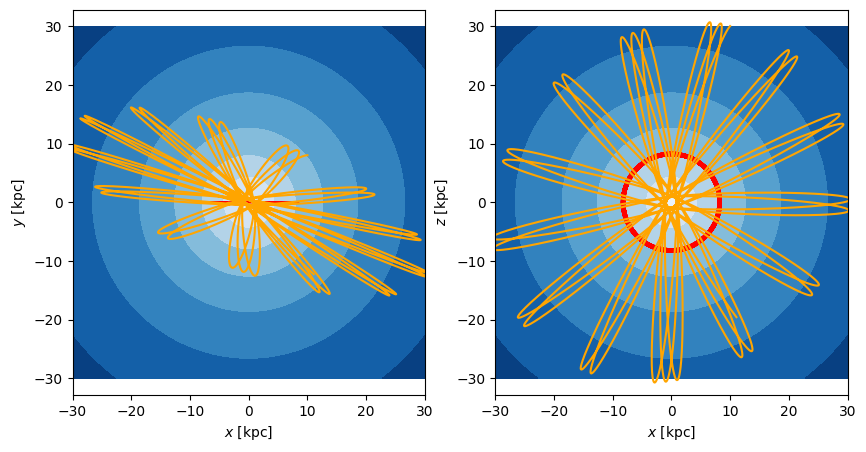

In [5]:
grid = np.linspace(-30,30,1000)

fig,ax = plt.subplots(1,2,figsize=(10,5))
orbit1.plot(components=['x','y'], color='red', axes=ax[0])
orbit2.plot(components=['x','y'], color='orange', axes=ax[0])
sphPot.plot_contours(grid=(grid,grid,0), ax=ax[0])
ax[0].set_xlim(grid[0],grid[-1])
ax[0].set_ylim(grid[0],grid[-1])

orbit1.plot(components=['x','z'], color='red', axes=ax[1])
orbit2.plot(components=['x','z'], color='orange', axes=ax[1])
sphPot.plot_contours(grid=(grid,0,grid), ax=ax[1])
ax[1].set_xlim(grid[0],grid[-1])
ax[1].set_ylim(grid[0],grid[-1])

plt.show()

### 3) Definir un volumen bien pequeño en el espacio de fases:
* Utilizar distribuciones Gaussianas 3D(sin covariacias) en posiciones y velocidades
* Utilizar las condiciones iniciales de mis orbitas como medias de las gaussianas
* Tomar sigma_x y sigma_v bien pequeños($~10^{-5}$)
* De estas Gaussianas, extraer un ser de 1000 C.Is adicionales

In [6]:
x1 = np.random.normal(loc=np.array(r_1),scale=np.array([1e-5,1e-5,1e-5]).T,size=(1000,3))
v1 = np.random.normal(loc=v_1,scale=[1e-5,1e-5,1e-5],size=(1000,3))
w1 = gd.PhaseSpacePosition(pos=x1.T*u.kpc,vel=v1.T*u.km/u.s)

x2 = np.random.normal(loc=np.array(r_2),scale=np.array([1e-5,1e-5,1e-5]).T,size=(1000,3))
v2 = np.random.normal(loc=v_2,scale=[1e-5,1e-5,1e-5],size=(1000,3))
w2 = gd.PhaseSpacePosition(pos=x2.T*u.kpc,vel=v2.T*u.km/u.s)

(<Figure size 1200x400 with 3 Axes>, <Figure size 1200x400 with 3 Axes>)

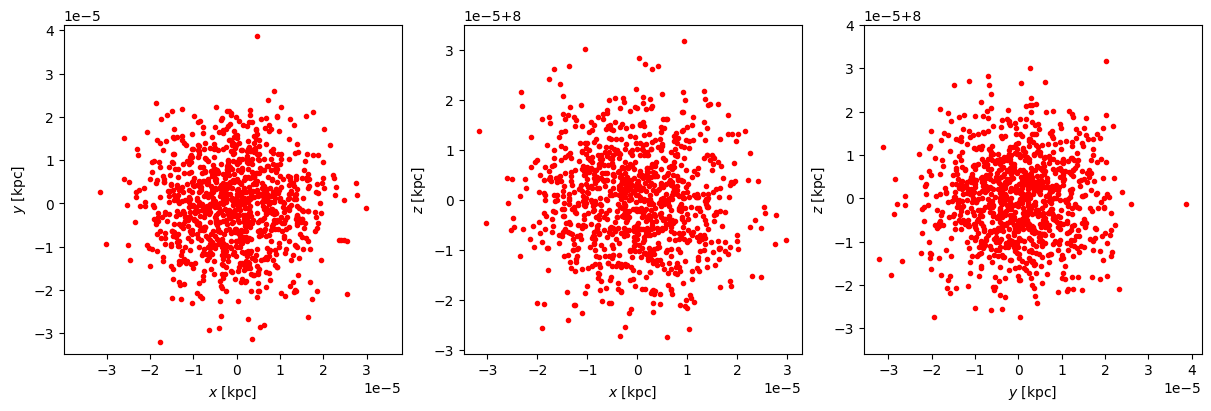

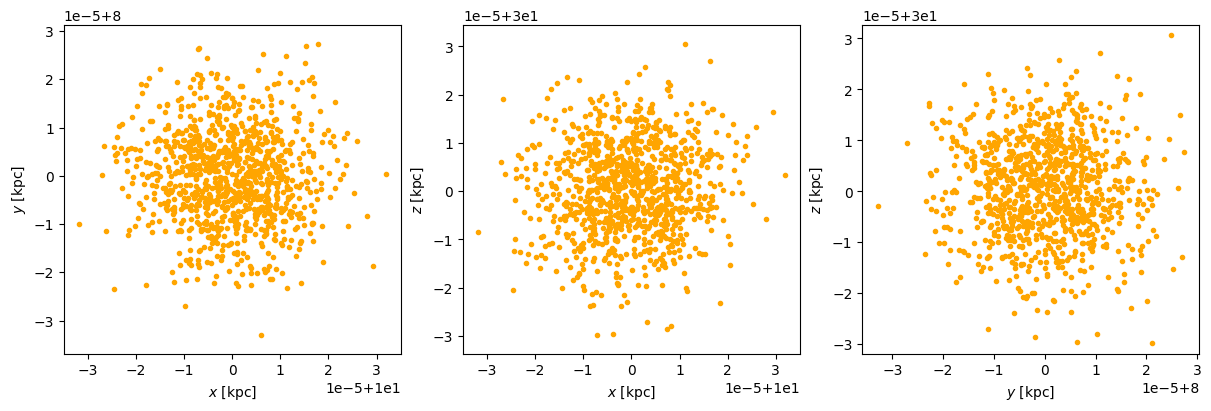

In [7]:
w1.plot(color='red'),w2.plot(color='orange')

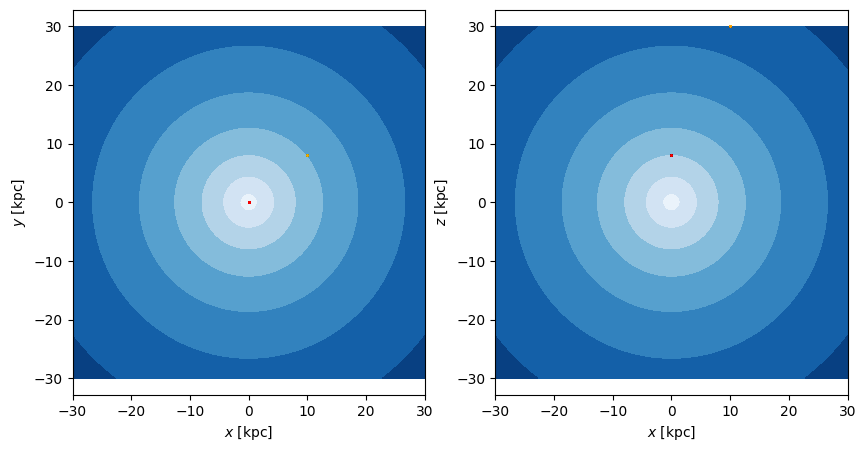

In [8]:
grid = np.linspace(-30,30,1000)

fig,ax = plt.subplots(1,2,figsize=(10,5))
w1.plot(components=['x','y'], color='red', axes=ax[0], s=.1, zorder=100)
w2.plot(components=['x','y'], color='orange', axes=ax[0], s=.1, zorder=100)
sphPot.plot_contours(grid=(grid,grid,0), ax=ax[0])
ax[0].set_xlim(grid[0],grid[-1])
ax[0].set_ylim(grid[0],grid[-1])

w1.plot(components=['x','z'], color='red', axes=ax[1], s=.1, zorder=100)
w2.plot(components=['x','z'], color='orange', axes=ax[1], s=.1, zorder=100)
sphPot.plot_contours(grid=(grid,0,grid), ax=ax[1])
ax[1].set_xlim(grid[0],grid[-1])
ax[1].set_ylim(grid[0],grid[-1])

plt.show()

### 4) Integrar cada una de estas orbitas pro 10Gyr. Llamaremos al conjunto total "enjambre"

In [9]:
orbits_swarm1 = gp.Hamiltonian(sphPot).integrate_orbit(w1, dt=dt, n_steps=t_f/dt)
orbits_swarm2 = gp.Hamiltonian(sphPot).integrate_orbit(w2, dt=dt, n_steps=t_f/dt)

### 5) Graficar y observar la evolucion de las orbitas del enjambre

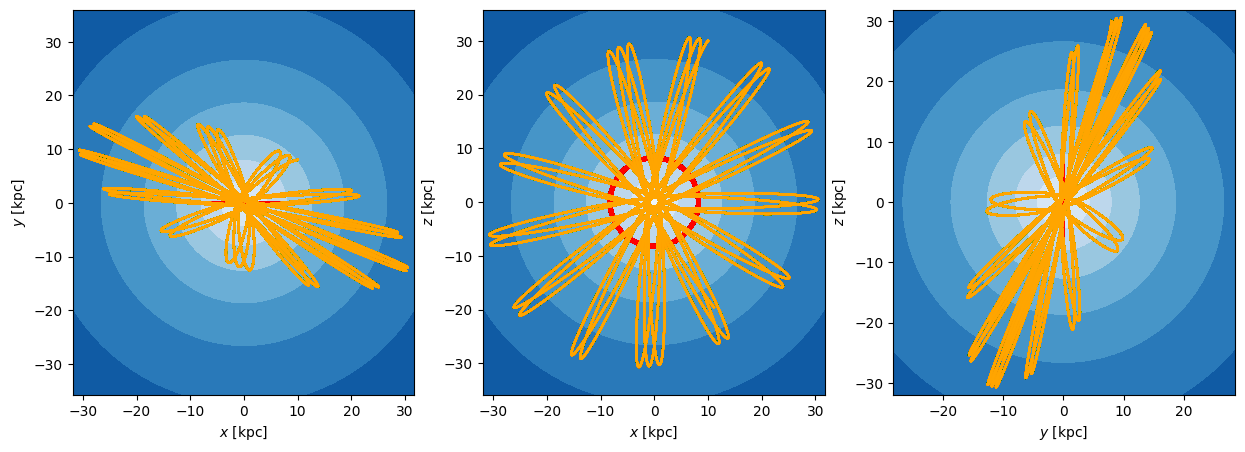

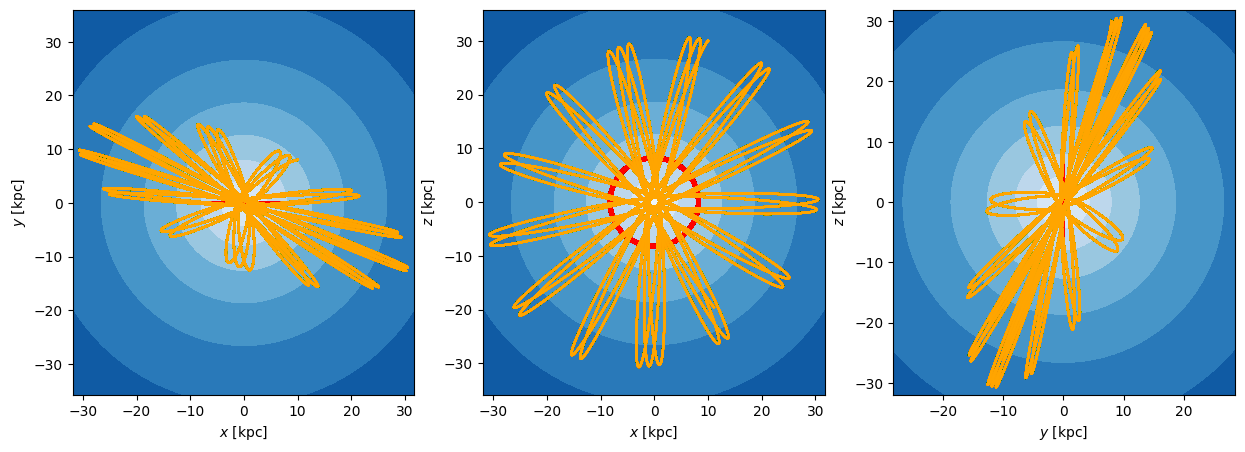

In [10]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
grid = np.linspace(-40,40,1000)

orbits_swarm1.plot(components=['x','y'], color='red', axes=ax[0], zorder=100)
orbits_swarm2.plot(components=['x','y'], color='orange', axes=ax[0], zorder=100)
sphPot.plot_contours(grid=(grid,grid,0), ax=ax[0])

orbits_swarm1.plot(components=['x','z'], color='red', axes=ax[1], zorder=100)
orbits_swarm2.plot(components=['x','z'], color='orange', axes=ax[1], zorder=100)
sphPot.plot_contours(grid=(grplot(id,0,grid), ax=ax[1])

orbits_swarm1.plot(components=['y','z'], color='red', axes=ax[2], zorder=100)
orbits_swarm2.plot(components=['y','z'], color='orange', axes=ax[2], zorder=100)
sphPot.plot_contours(grid=(0,grid,grid), ax=ax[2])

### 6) Graficar y observar evolucion del sigma_x y sigma_v del enjambre. Probar con los sigma 3D y los sigmas en cada dimension por separado

#### Fiteo de gaussianas :P

In [121]:
from scipy.stats import norm

mean_v_x_1, sigma_v_x_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_v_y_1, sigma_v_y_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_v_z_1, sigma_v_z_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_x_1, sigma_r_x_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_y_1, sigma_r_y_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_z_1, sigma_r_z_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_1, sigma_r_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_v_1, sigma_v_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_v_x_2, sigma_v_x_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_v_y_2, sigma_v_y_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_v_z_2, sigma_v_z_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_x_2, sigma_r_x_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_y_2, sigma_r_y_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_z_2, sigma_r_z_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_2, sigma_r_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_v_2, sigma_v_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))

t = np.zeros(int(t_f/dt))

for i_t in range(int(t_f/dt)):
    t[i_t] = i_t*dt.value
    # Load all phase space values(len equal to amount of particles)
    v_x_1 = orbits_swarm1[i_t,:].vel.d_x
    v_y_1 = orbits_swarm1[i_t,:].vel.d_x
    v_z_1 = orbits_swarm1[i_t,:].vel.d_x
    r_x_1 = orbits_swarm1[i_t,:].pos.x
    r_y_1 = orbits_swarm1[i_t,:].pos.y
    r_z_1 = orbits_swarm1[i_t,:].pos.z
    r_1 = orbits_swarm1[i_t,:].pos.norm()
    v_1 = orbits_swarm1[i_t,:].vel.norm()
    v_x_2 = orbits_swarm2[i_t,:].vel.d_x
    v_y_2 = orbits_swarm2[i_t,:].vel.d_x
    v_z_2 = orbits_swarm2[i_t,:].vel.d_x
    r_x_2 = orbits_swarm2[i_t,:].pos.x
    r_y_2 = orbits_swarm2[i_t,:].pos.y
    r_z_2 = orbits_swarm2[i_t,:].pos.z
    r_2 = orbits_swarm2[i_t,:].pos.norm()
    v_2 = orbits_swarm2[i_t,:].vel.norm()
    # Fit de los valores por cada uno
    mean_v_x_1[i_t], sigma_v_x_1[i_t] = norm.fit(v_x_1)
    mean_v_y_1[i_t], sigma_v_y_1[i_t] = norm.fit(v_y_1)
    mean_v_z_1[i_t], sigma_v_z_1[i_t] = norm.fit(v_z_1)
    mean_r_x_1[i_t], sigma_r_x_1[i_t] = norm.fit(r_x_1)
    mean_r_y_1[i_t], sigma_r_y_1[i_t] = norm.fit(r_y_1)
    mean_r_z_1[i_t], sigma_r_z_1[i_t] = norm.fit(r_z_1)
    mean_r_1[i_t], sigma_r_1[i_t] = norm.fit(r_1)
    mean_v_1[i_t], sigma_v_1[i_t] = norm.fit(v_1)
    mean_v_x_2[i_t], sigma_v_x_2[i_t] = norm.fit(v_x_2)
    mean_v_y_2[i_t], sigma_v_y_2[i_t] = norm.fit(v_y_2)
    mean_v_z_2[i_t], sigma_v_z_2[i_t] = norm.fit(v_z_2)
    mean_r_x_2[i_t], sigma_r_x_2[i_t] = norm.fit(r_x_2)
    mean_r_y_2[i_t], sigma_r_y_2[i_t] = norm.fit(r_y_2)
    mean_r_z_2[i_t], sigma_r_z_2[i_t] = norm.fit(r_z_2)
    mean_r_2[i_t], sigma_r_2[i_t] = norm.fit(r_2)
    mean_v_2[i_t], sigma_v_2[i_t] = norm.fit(v_2)

In [122]:
# unit assignment
mean_v_x_1 *= u.Myr/u.s
mean_v_y_1 *= u.Myr/u.s
mean_v_z_1 *= u.Myr/u.s
mean_r_x_1 *= u.kpc
mean_r_y_1 *= u.kpc
mean_r_z_1 *= u.kpc
mean_r_1 *= u.kpc
mean_v_1 *= u.Myr/u.s
mean_v_x_2 *= u.Myr/u.s
mean_v_y_2 *= u.Myr/u.s
mean_v_z_2 *= u.Myr/u.s
mean_r_x_2 *= u.kpc
mean_r_y_2 *= u.kpc
mean_r_z_2 *= u.kpc
mean_r_2 *= u.kpc
mean_v_2 *= u.Myr/u.s
sigma_v_x_1 *= u.Myr/u.s
sigma_v_y_1 *= u.Myr/u.s
sigma_v_z_1 *= u.Myr/u.s
sigma_r_x_1 *= u.kpc
sigma_r_y_1 *= u.kpc
sigma_r_z_1 *= u.kpc
sigma_r_1 *= u.kpc
sigma_v_1 *= u.Myr/u.s
sigma_v_x_2 *= u.Myr/u.s
sigma_v_y_2 *= u.Myr/u.s
sigma_v_z_2 *= u.Myr/u.s
sigma_r_x_2 *= u.kpc
sigma_r_y_2 *= u.kpc
sigma_r_z_2 *= u.kpc
sigma_r_2 *= u.kpc
sigma_v_2 *= u.Myr/u.s
t *= u.Myr

#### Ploteo ;D

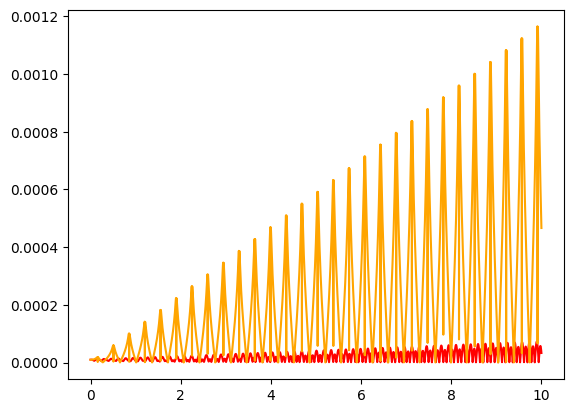

In [155]:
t = t.to('Gyr')
plt.plot(t,sigma_r_1,c='red')
plt.plot(t,sigma_r_2,c='orange')

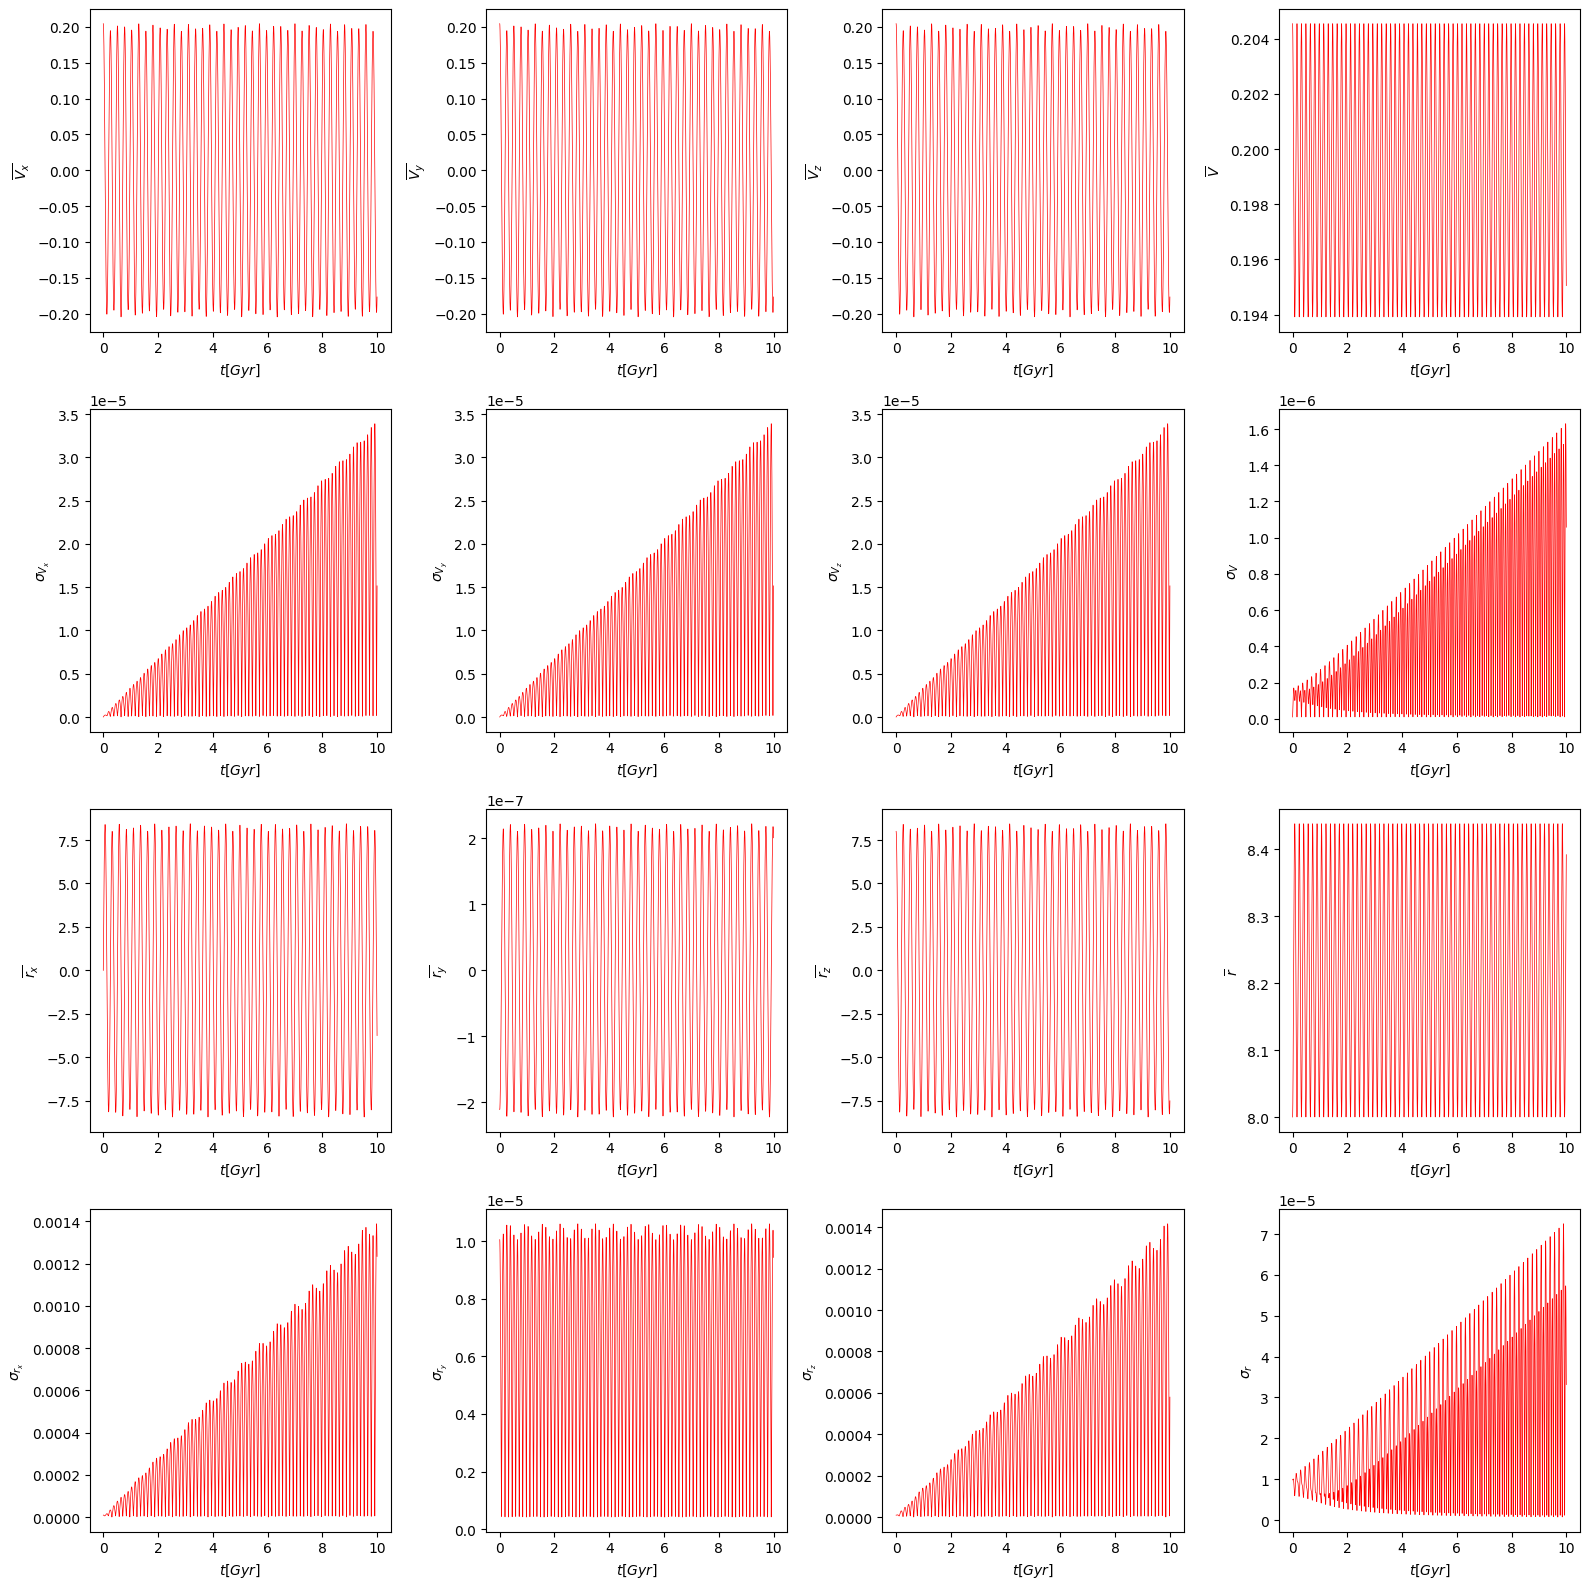

In [159]:
fig, axes = plt.subplots(4,4, figsize=(16,16))

list = [mean_v_x_1,mean_v_y_1,mean_v_z_1,mean_v_1,sigma_v_x_1,sigma_v_y_1,sigma_v_z_1,sigma_v_1,mean_r_x_1,mean_r_y_1,mean_r_z_1,mean_r_1,sigma_r_x_1,sigma_r_y_1,sigma_r_z_1,sigma_r_1]
name = [r'$\overline{V_x}$',r'$\overline{V_y}$',r'$\overline{V_z}$',r'$\overline{V}$',r'$\sigma_{V_x}$',r'$\sigma_{V_y}$',r'$\sigma_{V_z}$',r'$\sigma_{V}$',r'$\overline{r_x}$',r'$\overline{r_y}$',r'$\overline{r_z}$',r'$\overline{r}$',r'$\sigma_{r_x}$',r'$\sigma_{r_y}$',r'$\sigma_{r_z}$',r'$\sigma_{r}$']

i = 0
for row in axes:
    for col in row:
        col.plot(t,list[i], linewidth=.5,c='red')
        col.set_ylabel(name[i])
        col.set_xlabel(r'$t [Gyr]$')
        i += 1

fig.tight_layout()

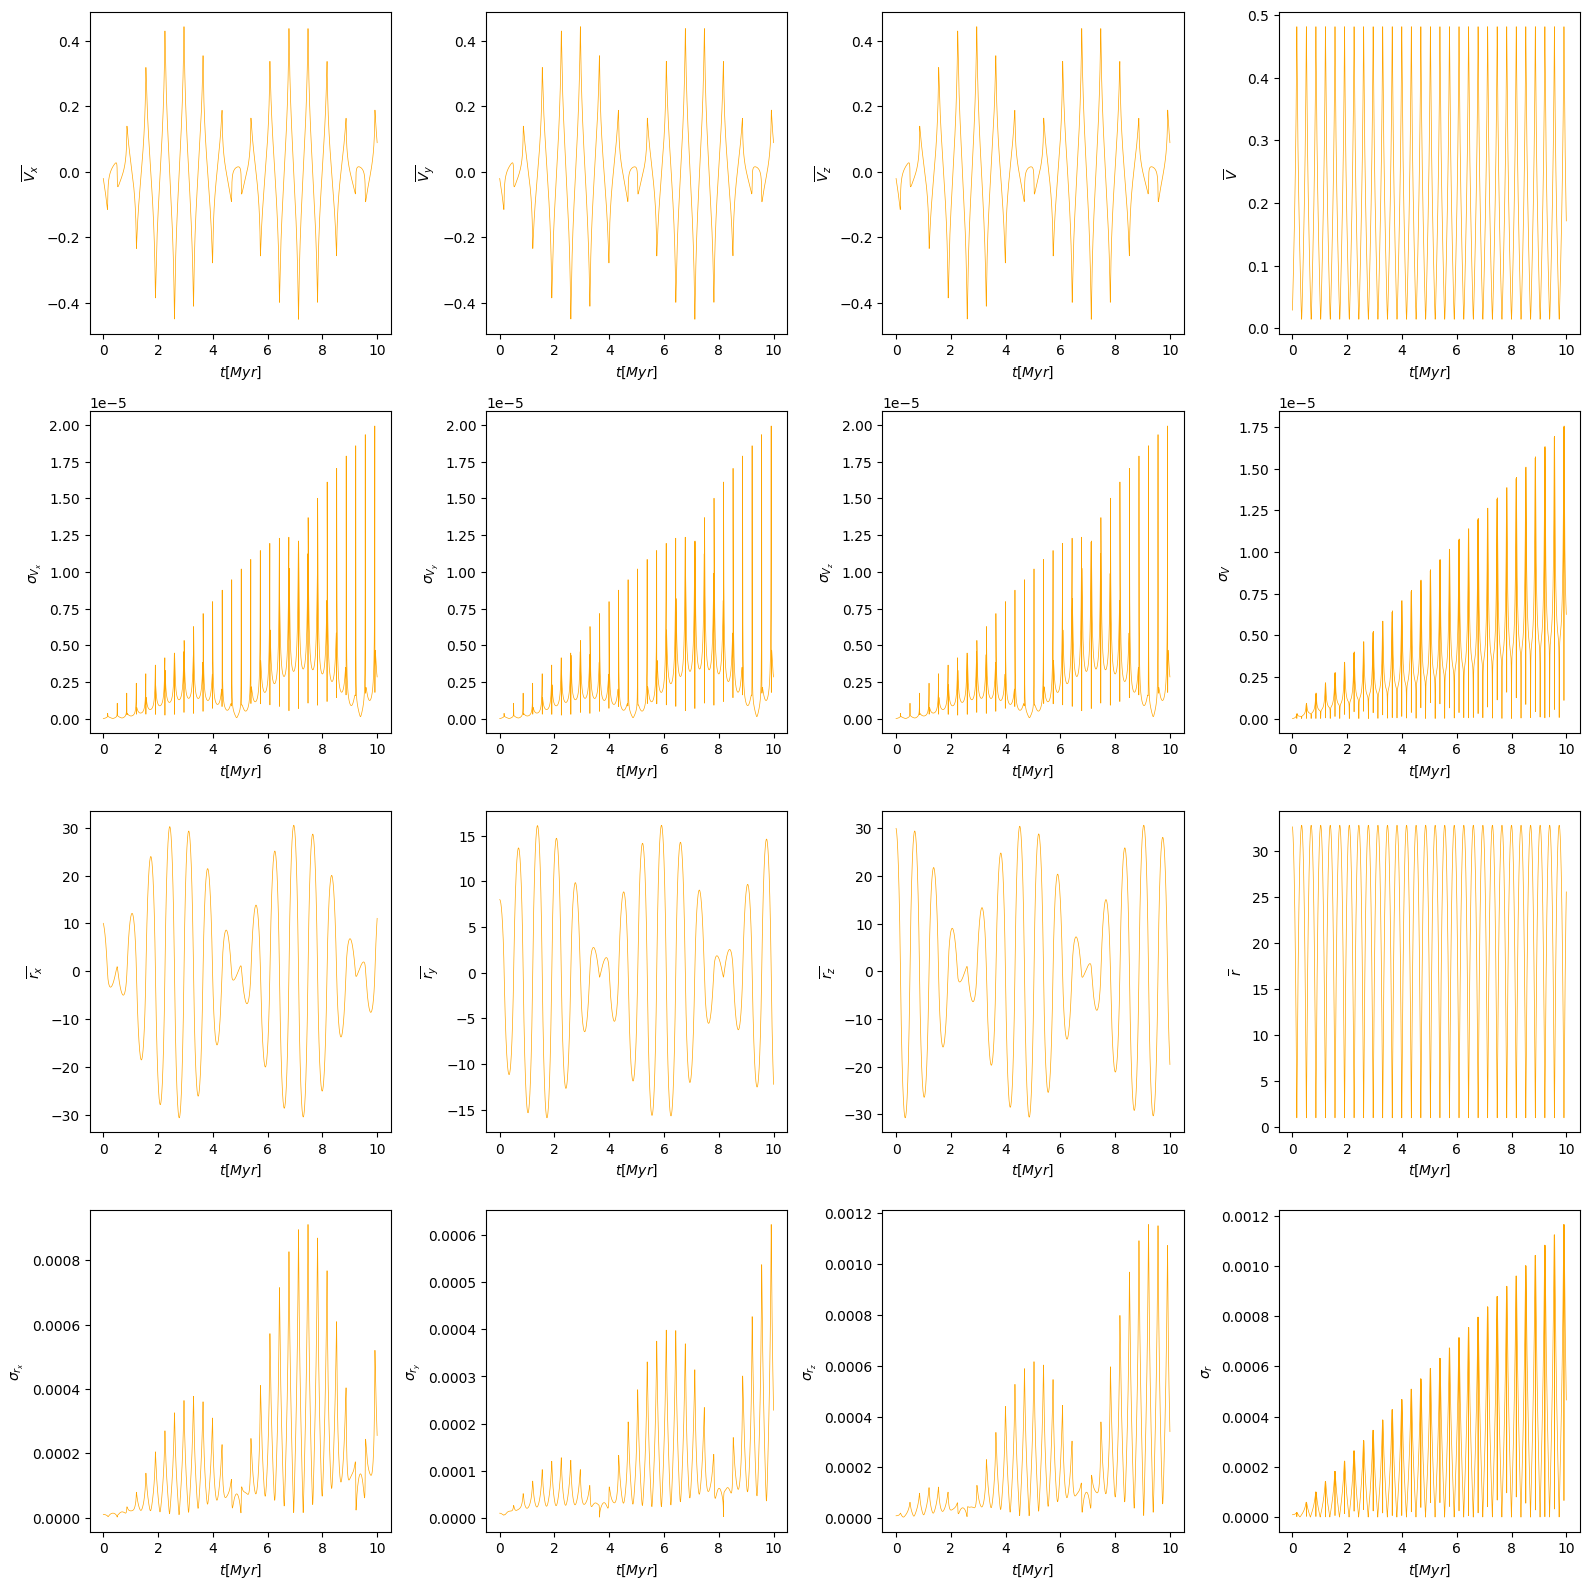

In [158]:
fig, axes = plt.subplots(4,4, figsize=(16,16))

list = [mean_v_x_2,mean_v_y_2,mean_v_z_2,mean_v_2,sigma_v_x_2,sigma_v_y_2,sigma_v_z_2,sigma_v_2,mean_r_x_2,mean_r_y_2,mean_r_z_2,mean_r_2,sigma_r_x_2,sigma_r_y_2,sigma_r_z_2,sigma_r_2]
name = [r'$\overline{V_x}$',r'$\overline{V_y}$',r'$\overline{V_z}$',r'$\overline{V}$',r'$\sigma_{V_x}$',r'$\sigma_{V_y}$',r'$\sigma_{V_z}$',r'$\sigma_{V}$',r'$\overline{r_x}$',r'$\overline{r_y}$',r'$\overline{r_z}$',r'$\overline{r}$',r'$\sigma_{r_x}$',r'$\sigma_{r_y}$',r'$\sigma_{r_z}$',r'$\sigma_{r}$']


i = 0
for row in axes:
    for col in row:
        col.plot(t,list[i], linewidth=.5,c='orange')
        col.set_ylabel(name[i])
        col.set_xlabel(r'$t [Myr]$')
        i += 1

fig.tight_layout()

### 7) Tomar esferas de 1 y 2,5 kpc de radio, centradas a todo tiempo t, en la orbita central del enjambre. En cada paso de integracion, calcular la densidad de particulas dentro de estas esferas.

In [224]:
R_1,R_2 = 1,2.5

V_1 = (4/3)*np.pi*(R_1*u.kpc)**3
V_2 = (4/3)*np.pi*(R_2*u.kpc)**3

In [225]:
V_1,V_2

(<Quantity 4.1887902 kpc3>, <Quantity 65.44984695 kpc3>)

In [226]:
rho1_1 = np.zeros(int(t_f/dt))
rho1_2 = np.zeros(int(t_f/dt))

for i_t in range(int(t_f/dt)):
    r_1 = orbits_swarm1[i_t,:].pos - orbit1.pos[i_t]
    r_1 = r_1.norm()
    rho1_1[i_t] = len(np.where(r_1.value < R_1)[0])/V_1.value
    rho1_2[i_t] = len(np.where(r_1.value < R_2)[0])/V_2.value

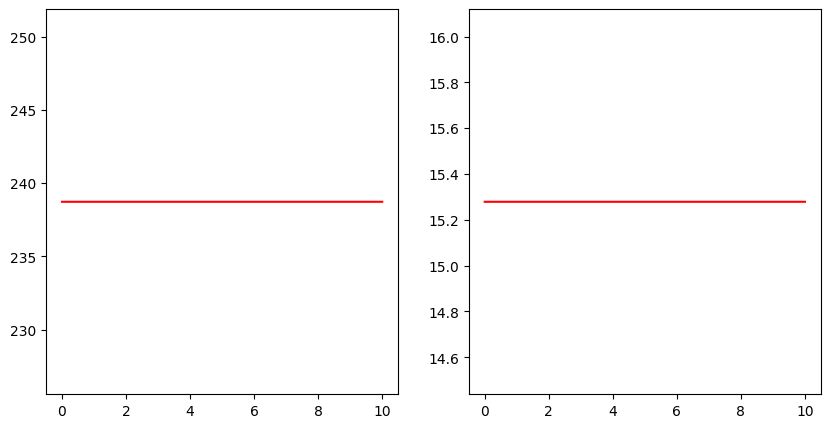

In [227]:
fig, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(t,rho1_1,c='red')
axes[1].plot(t,rho1_2,c='red')

In [228]:
rho2_1 = np.zeros(int(t_f/dt))
rho2_2 = np.zeros(int(t_f/dt))

for i_t in range(int(t_f/dt)):
    r_2 = orbits_swarm2[i_t,:].pos - orbit2.pos[i_t]
    r_2 = r_2.norm()
    rho2_1[i_t] = len(np.where(r_2.value < R_1)[0])/V_1.value
    rho2_2[i_t] = len(np.where(r_2.value < R_2)[0])/V_2.value

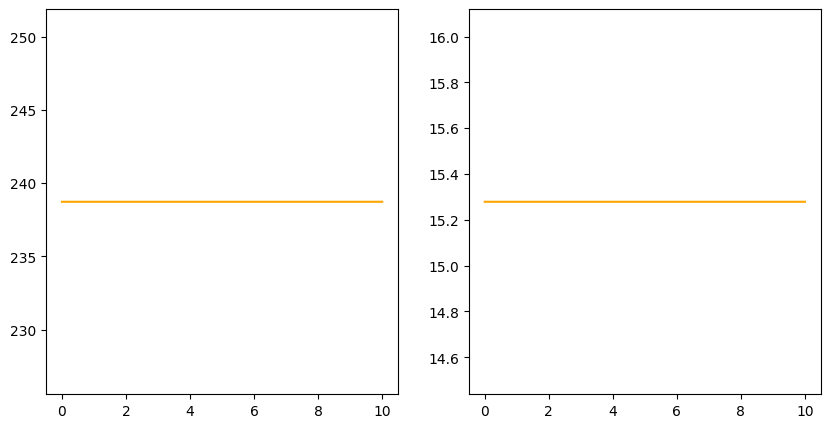

In [229]:
fig, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(t,rho2_1,c='orange')
axes[1].plot(t,rho2_2,c='orange')

### 8) Repetir el experimento considerando:
* Un potencial NFW triaxial
* Un potencial MW-like

#### Funcion epico fantastica que genera todos los plots dado pot y 2 ics

In [2]:
# debido a que es posible que se requiera cambiar potencial y ics mucho aqui hay una funcion que hace todo lo de arriba dado un potencial y 2 ics
# por que dioh mio
from scipy.stats import norm
from constructor import *

def the_whole_damn_thing(pot,r_1,v_1,r_2,v_2,
                         dt=0.4*u.Myr,t_f=10*u.Gyr,
                         sigma_3d=1e-5,
                         grid=np.linspace(-40,40,1000),
                         R_1=1,R_2=2.5
                        ):
    obj1 = gd.PhaseSpacePosition(r_1,v_1)
    obj2 = gd.PhaseSpacePosition(r_2,v_2)
    orbit1 = gp.Hamiltonian(pot).integrate_orbit(obj1, dt=dt, n_steps=t_f/dt)
    orbit2 = gp.Hamiltonian(pot).integrate_orbit(obj2, dt=dt, n_steps=t_f/dt)
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    orbit1.plot(components=['x','y'], color='red', axes=ax[0])
    orbit2.plot(components=['x','y'], color='orange', axes=ax[0])
    sphPot.plot_contours(grid=(grid,grid,0), ax=ax[0])
    ax[0].set_xlim(grid[0],grid[-1])
    ax[0].set_ylim(grid[0],grid[-1])
    
    orbit1.plot(components=['x','z'], color='red', axes=ax[1])
    orbit2.plot(components=['x','z'], color='orange', axes=ax[1])
    sphPot.plot_contours(grid=(grid,0,grid), ax=ax[1])
    ax[1].set_xlim(grid[0],grid[-1])
    ax[1].set_ylim(grid[0],grid[-1])
    
    plt.show()
    plt.clf()
    #############################
    x1 = np.random.normal(loc=np.array(r_1),scale=np.array([1e-5,1e-5,1e-5]).T,size=(1000,3))
    v1 = np.random.normal(loc=v_1,scale=[1e-5,1e-5,1e-5],size=(1000,3))
    w1 = gd.PhaseSpacePosition(pos=x1.T*u.kpc,vel=v1.T*u.km/u.s)
    
    x2 = np.random.normal(loc=np.array(r_2),scale=np.array([1e-5,1e-5,1e-5]).T,size=(1000,3))
    v2 = np.random.normal(loc=v_2,scale=[1e-5,1e-5,1e-5],size=(1000,3))
    w2 = gd.PhaseSpacePosition(pos=x2.T*u.kpc,vel=v2.T*u.km/u.s)
    #############################
    w1.plot(color='red')
    plt.show()
    plt.clf()
    w2.plot(color='orange')
    plt.show()
    plt.clf()
    ####################################
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    w1.plot(components=['x','y'], color='red', axes=ax[0], s=.1, zorder=100)
    w2.plot(components=['x','y'], color='orange', axes=ax[0], s=.1, zorder=100)
    sphPot.plot_contours(grid=(grid,grid,0), ax=ax[0])
    ax[0].set_xlim(grid[0],grid[-1])
    ax[0].set_ylim(grid[0],grid[-1])
    
    w1.plot(components=['x','z'], color='red', axes=ax[1], s=.1, zorder=100)
    w2.plot(components=['x','z'], color='orange', axes=ax[1], s=.1, zorder=100)
    sphPot.plot_contours(grid=(grid,0,grid), ax=ax[1])
    ax[1].set_xlim(grid[0],grid[-1])
    ax[1].set_ylim(grid[0],grid[-1])
    
    plt.show()
    plt.clf()
    ####################################
    orbits_swarm1 = gp.Hamiltonian(sphPot).integrate_orbit(w1, dt=dt, n_steps=t_f/dt)
    orbits_swarm2 = gp.Hamiltonian(sphPot).integrate_orbit(w2, dt=dt, n_steps=t_f/dt)
    fig,ax = plt.subplots(1,3,figsize=(15,5))
    
    orbits_swarm1.plot(components=['x','y'], color='red', axes=ax[0], zorder=100)
    orbits_swarm2.plot(components=['x','y'], color='orange', axes=ax[0], zorder=100)
    sphPot.plot_contours(grid=(grid,grid,0), ax=ax[0])
    
    orbits_swarm1.plot(components=['x','z'], color='red', axes=ax[1], zorder=100)
    orbits_swarm2.plot(components=['x','z'], color='orange', axes=ax[1], zorder=100)
    sphPot.plot_contours(grid=(grid,0,grid), ax=ax[1])
    
    orbits_swarm1.plot(components=['y','z'], color='red', axes=ax[2], zorder=100)
    orbits_swarm2.plot(components=['y','z'], color='orange', axes=ax[2], zorder=100)
    sphPot.plot_contours(grid=(0,grid,grid), ax=ax[2])
    plt.clf
    ###################################
    mean_v_x_1, sigma_v_x_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_v_y_1, sigma_v_y_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_v_z_1, sigma_v_z_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_r_x_1, sigma_r_x_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_r_y_1, sigma_r_y_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_r_z_1, sigma_r_z_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_r_1, sigma_r_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_v_1, sigma_v_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_v_x_2, sigma_v_x_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_v_y_2, sigma_v_y_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_v_z_2, sigma_v_z_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_r_x_2, sigma_r_x_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_r_y_2, sigma_r_y_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_r_z_2, sigma_r_z_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_r_2, sigma_r_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_v_2, sigma_v_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    
    t = np.zeros(int(t_f/dt))
    
    for i_t in range(int(t_f/dt)):
        t[i_t] = i_t*dt.value
        # Load all phase space values(len equal to amount of particles)
        v_x_1 = orbits_swarm1[i_t,:].vel.d_x
        v_y_1 = orbits_swarm1[i_t,:].vel.d_x
        v_z_1 = orbits_swarm1[i_t,:].vel.d_x
        r_x_1 = orbits_swarm1[i_t,:].pos.x
        r_y_1 = orbits_swarm1[i_t,:].pos.y
        r_z_1 = orbits_swarm1[i_t,:].pos.z
        r_1 = orbits_swarm1[i_t,:].pos.norm()
        v_1 = orbits_swarm1[i_t,:].vel.norm()
        v_x_2 = orbits_swarm2[i_t,:].vel.d_x
        v_y_2 = orbits_swarm2[i_t,:].vel.d_x
        v_z_2 = orbits_swarm2[i_t,:].vel.d_x
        r_x_2 = orbits_swarm2[i_t,:].pos.x
        r_y_2 = orbits_swarm2[i_t,:].pos.y
        r_z_2 = orbits_swarm2[i_t,:].pos.z
        r_2 = orbits_swarm2[i_t,:].pos.norm()
        v_2 = orbits_swarm2[i_t,:].vel.norm()
        # Fit de los valores por cada uno
        mean_v_x_1[i_t], sigma_v_x_1[i_t] = norm.fit(v_x_1)
        mean_v_y_1[i_t], sigma_v_y_1[i_t] = norm.fit(v_y_1)
        mean_v_z_1[i_t], sigma_v_z_1[i_t] = norm.fit(v_z_1)
        mean_r_x_1[i_t], sigma_r_x_1[i_t] = norm.fit(r_x_1)
        mean_r_y_1[i_t], sigma_r_y_1[i_t] = norm.fit(r_y_1)
        mean_r_z_1[i_t], sigma_r_z_1[i_t] = norm.fit(r_z_1)
        mean_r_1[i_t], sigma_r_1[i_t] = norm.fit(r_1)
        mean_v_1[i_t], sigma_v_1[i_t] = norm.fit(v_1)
        mean_v_x_2[i_t], sigma_v_x_2[i_t] = norm.fit(v_x_2)
        mean_v_y_2[i_t], sigma_v_y_2[i_t] = norm.fit(v_y_2)
        mean_v_z_2[i_t], sigma_v_z_2[i_t] = norm.fit(v_z_2)
        mean_r_x_2[i_t], sigma_r_x_2[i_t] = norm.fit(r_x_2)
        mean_r_y_2[i_t], sigma_r_y_2[i_t] = norm.fit(r_y_2)
        mean_r_z_2[i_t], sigma_r_z_2[i_t] = norm.fit(r_z_2)
        mean_r_2[i_t], sigma_r_2[i_t] = norm.fit(r_2)
        mean_v_2[i_t], sigma_v_2[i_t] = norm.fit(v_2)
        # unit assignment
    mean_v_x_1 *= u.Myr/u.s
    mean_v_y_1 *= u.Myr/u.s
    mean_v_z_1 *= u.Myr/u.s
    mean_r_x_1 *= u.kpc
    mean_r_y_1 *= u.kpc
    mean_r_z_1 *= u.kpc
    mean_r_1 *= u.kpc
    mean_v_1 *= u.Myr/u.s
    mean_v_x_2 *= u.Myr/u.s
    mean_v_y_2 *= u.Myr/u.s
    mean_v_z_2 *= u.Myr/u.s
    mean_r_x_2 *= u.kpc
    mean_r_y_2 *= u.kpc
    mean_r_z_2 *= u.kpc
    mean_r_2 *= u.kpc
    mean_v_2 *= u.Myr/u.s
    sigma_v_x_1 *= u.Myr/u.s
    sigma_v_y_1 *= u.Myr/u.s
    sigma_v_z_1 *= u.Myr/u.s
    sigma_r_x_1 *= u.kpc
    sigma_r_y_1 *= u.kpc
    sigma_r_z_1 *= u.kpc
    sigma_r_1 *= u.kpc
    sigma_v_1 *= u.Myr/u.s
    sigma_v_x_2 *= u.Myr/u.s
    sigma_v_y_2 *= u.Myr/u.s
    sigma_v_z_2 *= u.Myr/u.s
    sigma_r_x_2 *= u.kpc
    sigma_r_y_2 *= u.kpc
    sigma_r_z_2 *= u.kpc
    sigma_r_2 *= u.kpc
    sigma_v_2 *= u.Myr/u.s
    t *= u.Myr
    t = t.to('Gyr')
    plt.plot(t,sigma_r_1,c='red')
    plt.plot(t,sigma_r_2,c='orange')
    plt.show()
    plt.clf()
    ###############################
    fig, axes = plt.subplots(4,4, figsize=(16,16))
    
    list = [mean_v_x_1,mean_v_y_1,mean_v_z_1,mean_v_1,sigma_v_x_1,sigma_v_y_1,sigma_v_z_1,sigma_v_1,mean_r_x_1,mean_r_y_1,mean_r_z_1,mean_r_1,sigma_r_x_1,sigma_r_y_1,sigma_r_z_1,sigma_r_1]
    name = [r'$\overline{V_x}$',r'$\overline{V_y}$',r'$\overline{V_z}$',r'$\overline{V}$',r'$\sigma_{V_x}$',r'$\sigma_{V_y}$',r'$\sigma_{V_z}$',r'$\sigma_{V}$',r'$\overline{r_x}$',r'$\overline{r_y}$',r'$\overline{r_z}$',r'$\overline{r}$',r'$\sigma_{r_x}$',r'$\sigma_{r_y}$',r'$\sigma_{r_z}$',r'$\sigma_{r}$']
    
    i = 0
    for row in axes:
        for col in row:
            col.plot(t,list[i], linewidth=.5,c='red')
            col.set_ylabel(name[i])
            col.set_xlabel(r'$t [Gyr]$')
            i += 1
    
    fig.tight_layout()
    plt.show()
    plt.clf()
    fig, axes = plt.subplots(4,4, figsize=(16,16))
    
    list = [mean_v_x_2,mean_v_y_2,mean_v_z_2,mean_v_2,sigma_v_x_2,sigma_v_y_2,sigma_v_z_2,sigma_v_2,mean_r_x_2,mean_r_y_2,mean_r_z_2,mean_r_2,sigma_r_x_2,sigma_r_y_2,sigma_r_z_2,sigma_r_2]
    name = [r'$\overline{V_x}$',r'$\overline{V_y}$',r'$\overline{V_z}$',r'$\overline{V}$',r'$\sigma_{V_x}$',r'$\sigma_{V_y}$',r'$\sigma_{V_z}$',r'$\sigma_{V}$',r'$\overline{r_x}$',r'$\overline{r_y}$',r'$\overline{r_z}$',r'$\overline{r}$',r'$\sigma_{r_x}$',r'$\sigma_{r_y}$',r'$\sigma_{r_z}$',r'$\sigma_{r}$']
    
    
    i = 0
    for row in axes:
        for col in row:
            col.plot(t,list[i], linewidth=.5,c='orange')
            col.set_ylabel(name[i])
            col.set_xlabel(r'$t [Myr]$')
            i += 1
    
    fig.tight_layout()
    plt.show()
    plt.clf()
    #####################################
    V_1 = (4/3)*np.pi*(R_1*u.kpc)**3
    V_2 = (4/3)*np.pi*(R_2*u.kpc)**3
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    axes[0].plot(t,rho1_1,c='red')
    axes[1].plot(t,rho1_2,c='red')
    plt.show()
    plt.clf()
    rho2_1 = np.zeros(int(t_f/dt))
    rho2_2 = np.zeros(int(t_f/dt))
    
    for i_t in range(int(t_f/dt)):
        r_2 = orbits_swarm2[i_t,:].pos - orbit2.pos[i_t]
        r_2 = r_2.norm()
        rho2_1[i_t] = len(np.where(r_2.value < R_1)[0])/V_1.value
        rho2_2[i_t] = len(np.where(r_2.value < R_2)[0])/V_2.value
    plt.show()
    plt.clf()

#### Probando otros potenciales :p

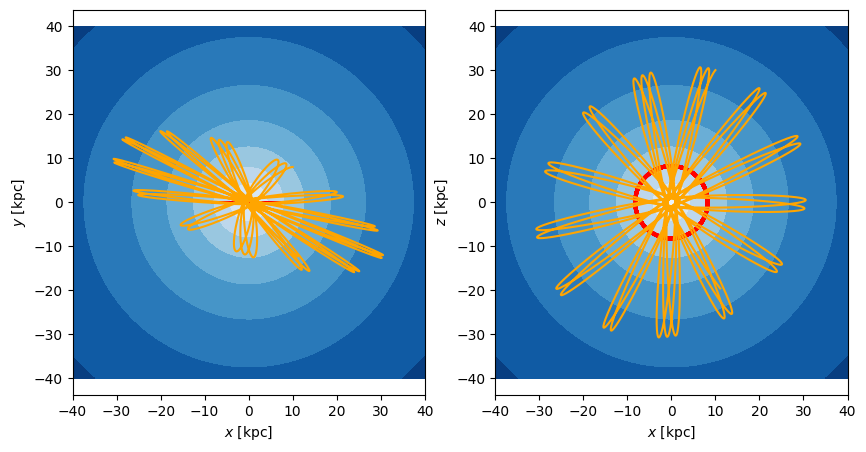

<Figure size 640x480 with 0 Axes>

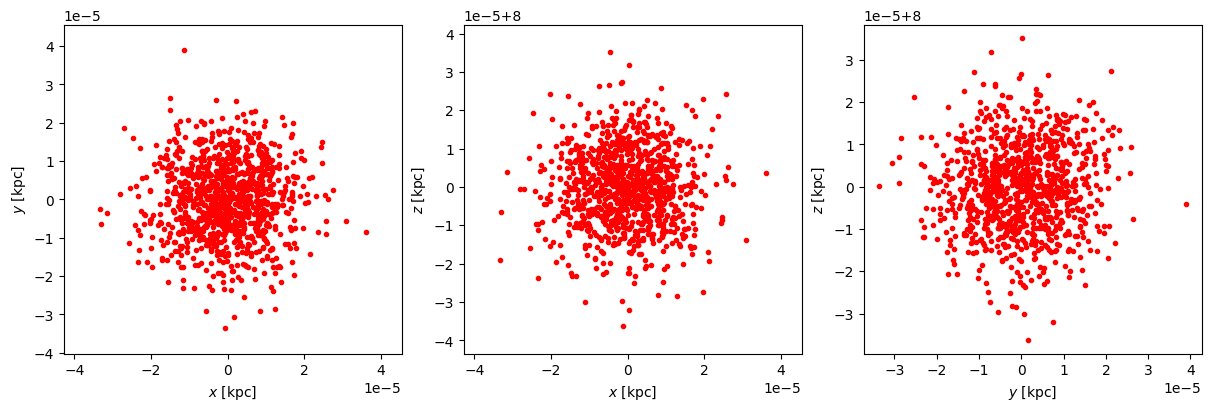

<Figure size 640x480 with 0 Axes>

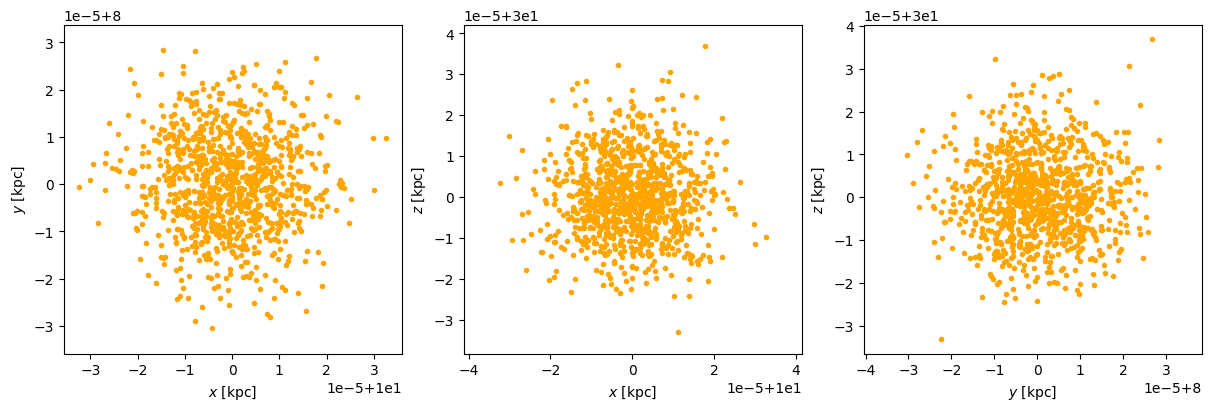

<Figure size 640x480 with 0 Axes>

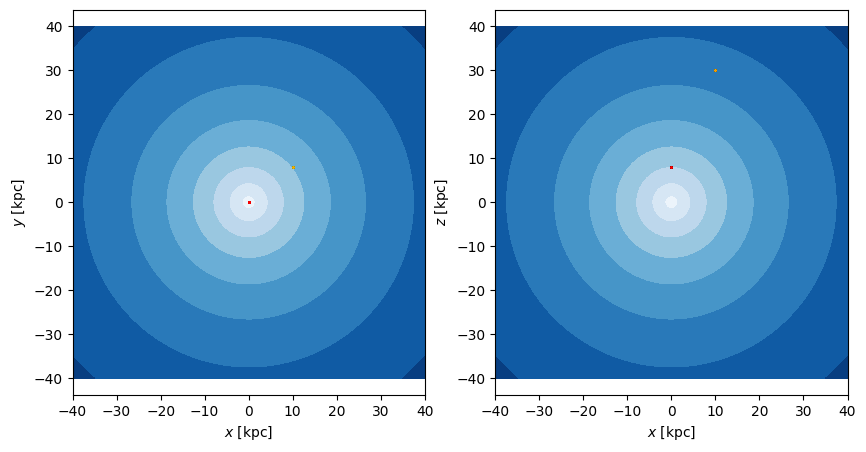

<Figure size 640x480 with 0 Axes>

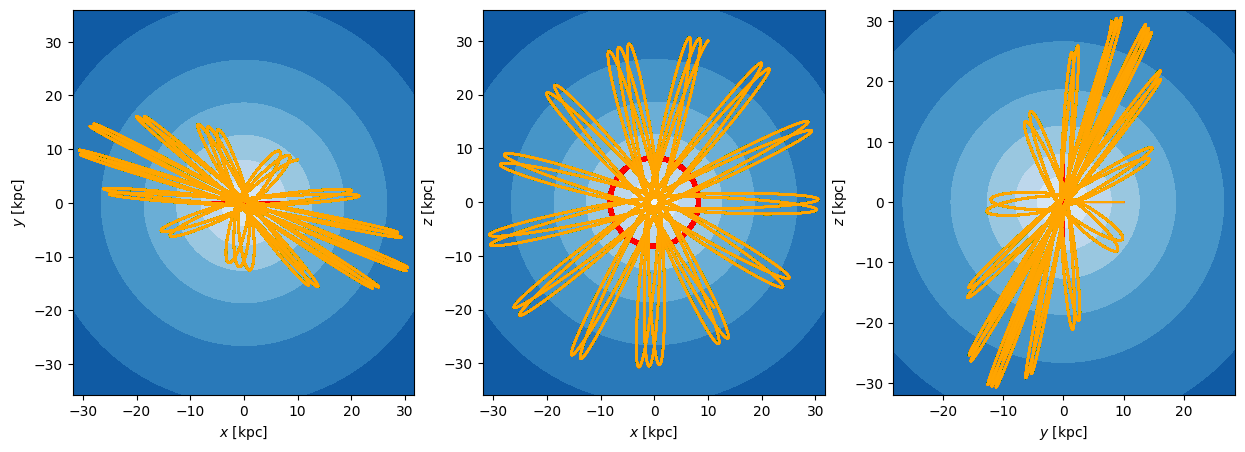

<Figure size 640x480 with 0 Axes>

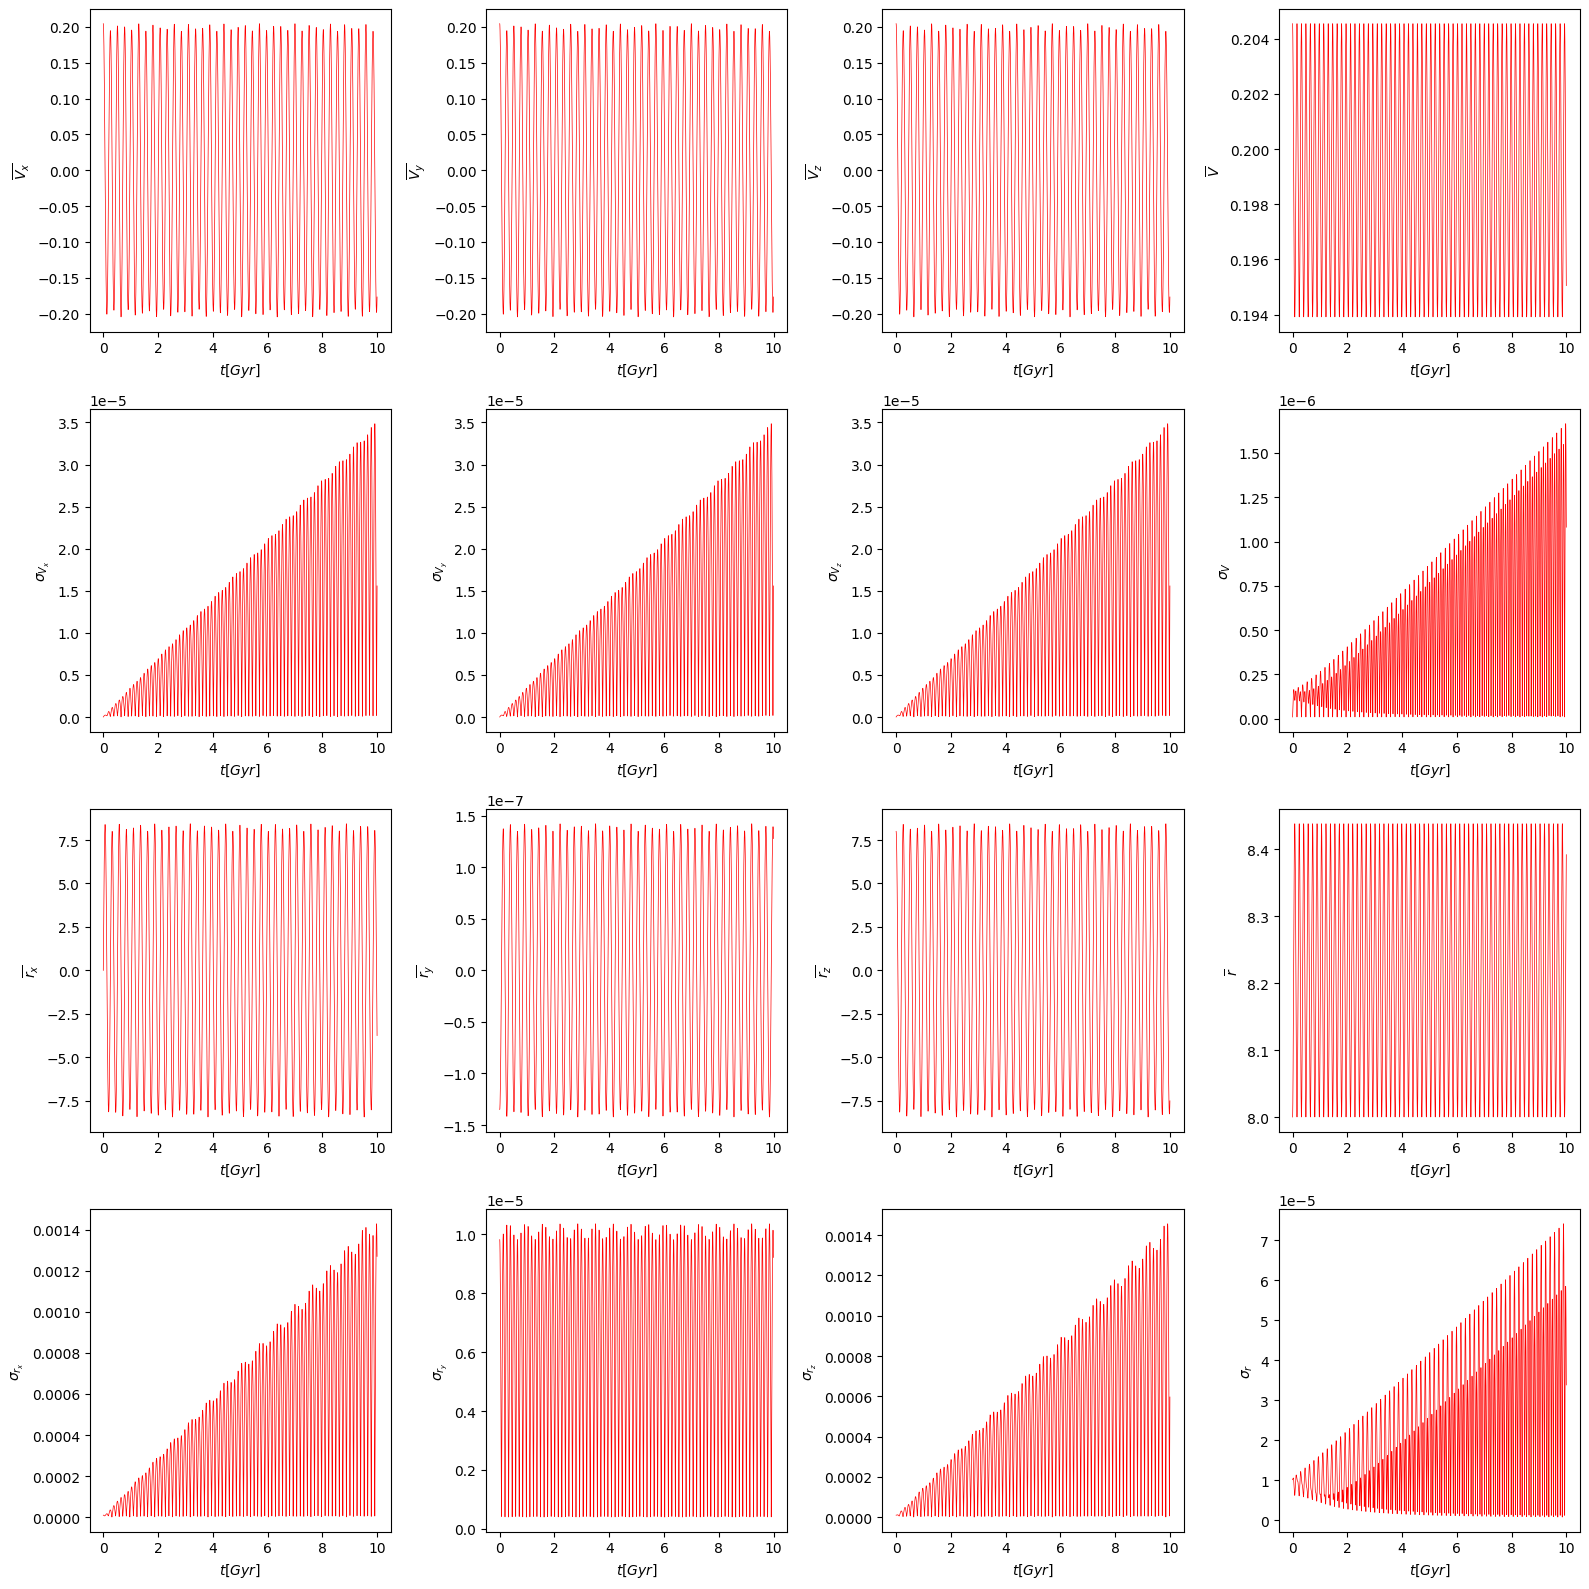

<Figure size 640x480 with 0 Axes>

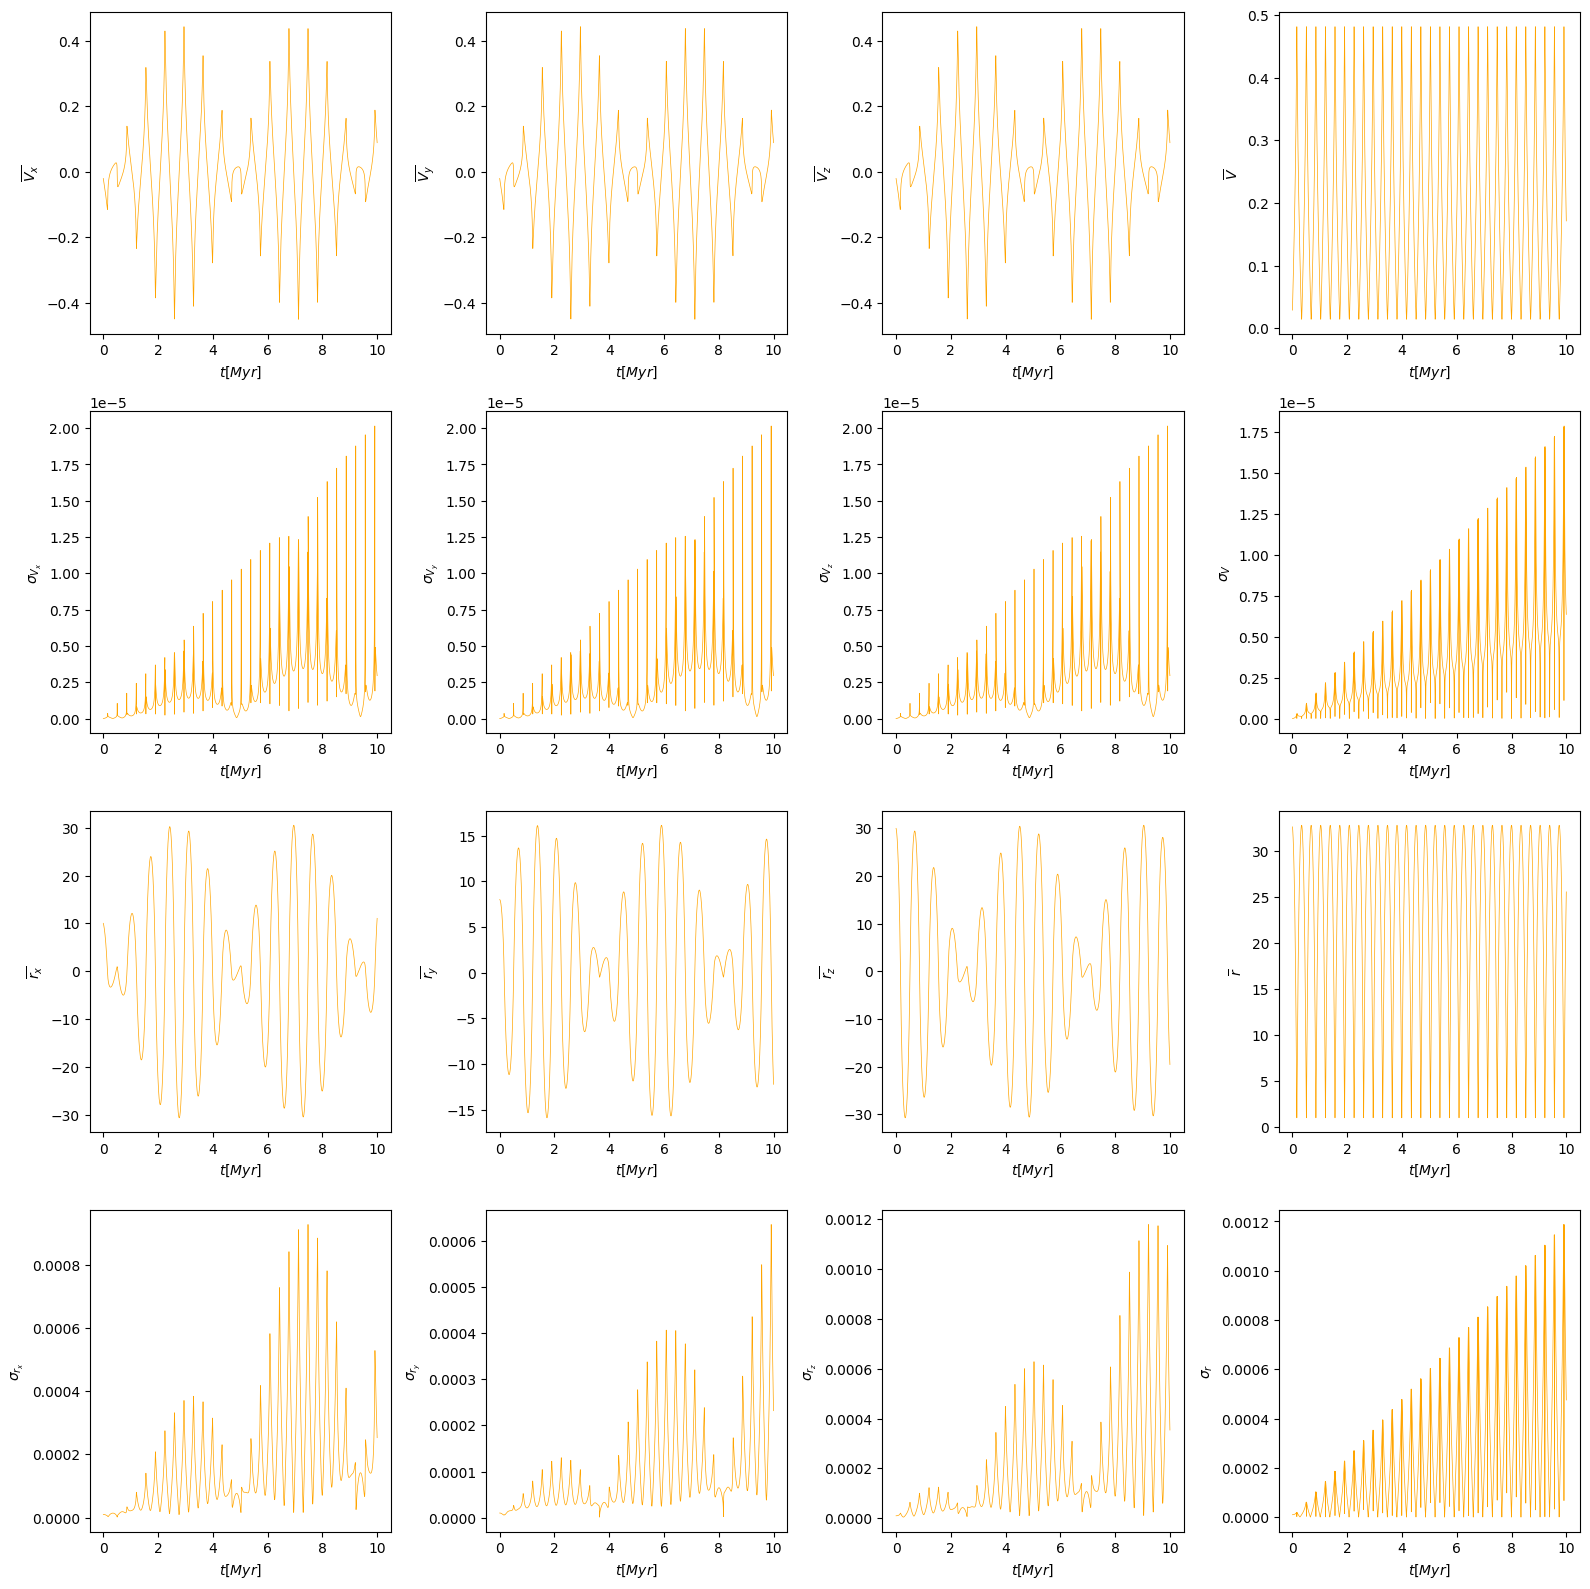

NameError: name 'rho1_1' is not defined

<Figure size 640x480 with 0 Axes>

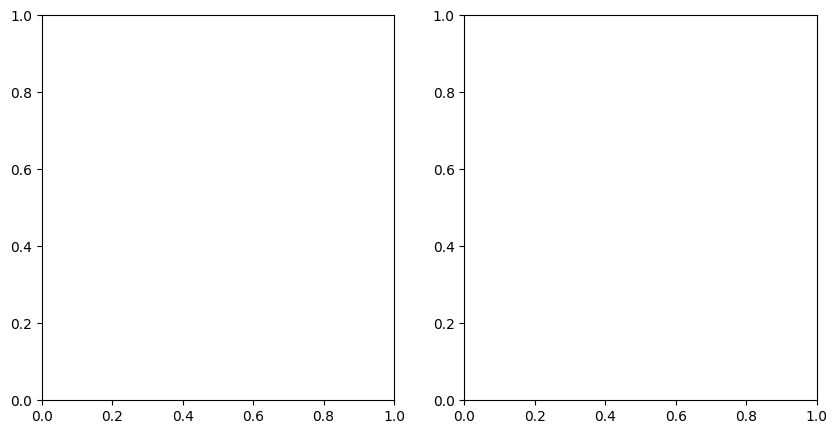

In [3]:
# Repitiendo items anteriores para probar :D
import gala.dynamics as gd
r_1 = [0,0,8] * u.kpc
v_1 = [200,0,0] * (u.km/u.s)
r_2 = [10,8,30] * u.kpc
v_2 = [-20,0,-20] * (u.km/u.s)
sphPot = gp.NFWPotential.from_M200_c(M200 = 1.842e12 * u.M_sun, c= 16.098, units=galactic)

the_whole_damn_thing(sphPot,r_1,v_1,r_2,v_2)

### 9) Comparar resultados y discutir